In [1]:
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import bz2

sys.path.append('..')

from ruv.relative_utility_value import *
from ruv.damage_functions import *
from ruv.economic_models import *
from ruv.utility_functions import *

In [2]:
plt.rcParams['figure.figsize'] = (8, 7)

plt.rcParams['font.family'] = "calibri"
plt.rcParams['font.size'] = "12.5"

colors = {
    'black': '#000000',
    'light_orange': '#E69F00',
    'light_blue': '#56B4E9',
    'green': '#009E73',
    'yellow': '#F0E442',
    'dark blue': '#0072B2',
    'dark_orange': '#D55E00',
    'pink': '#CC79A7'
} 

# Example forecast dataset
### 7th day ahead forecast for Murray at Biggara (401012) generated using the MuTHRE method

In [3]:
dataset_filepath = 'example_data.pickle.bz2'
parallel_nodes = 8
alpha_step = 0.02

In [4]:
with bz2.BZ2File(dataset_filepath, 'r') as f:
    data = pickle.load(f)
obs, clim_ens, fcst_ens = data['obs'], data['clim'].T, data['fcst'].T
print(obs.shape, fcst_ens.shape, clim_ens.shape)

(276,) (276, 100) (276, 496)


# Compare alternative decision making methods on a value diagram

In [5]:
decision_definition = {
    'alphas': np.arange(alpha_step, 1, alpha_step),
    'damage_function': [binary, {'max_loss': 1, 'min_loss': 0, 'threshold': 0.75}],
    'utility_function': [cara, {'A': 0}],
    'economic_model': [cost_loss, cost_loss_analytical_spend],
    'decision_thresholds': np.nanquantile(obs, [0, 0.75])
}

# 'decision_method' defaults to 'optimise_over_forecast_distribution'

ref = None  # use event frequency as the reference forecast

In [6]:
results_optim = relative_utility_value(obs, fcst_ens, ref, decision_definition, parallel_nodes=parallel_nodes)

Alpha: 0.020   RUV: 0.64
Alpha: 0.040   RUV: 0.71
Alpha: 0.060   RUV: 0.68
Alpha: 0.080   RUV: 0.73
Alpha: 0.100   RUV: 0.77
Alpha: 0.120   RUV: 0.78
Alpha: 0.140   RUV: 0.73
Alpha: 0.160   RUV: 0.76
Alpha: 0.180   RUV: 0.77
Alpha: 0.200   RUV: 0.77
Alpha: 0.220   RUV: 0.79
Alpha: 0.240   RUV: 0.81
Alpha: 0.260   RUV: 0.82
Alpha: 0.280   RUV: 0.80
Alpha: 0.300   RUV: 0.79
Alpha: 0.320   RUV: 0.77
Alpha: 0.340   RUV: 0.77
Alpha: 0.360   RUV: 0.75
Alpha: 0.380   RUV: 0.74
Alpha: 0.400   RUV: 0.76
Alpha: 0.420   RUV: 0.76
Alpha: 0.440   RUV: 0.75
Alpha: 0.460   RUV: 0.75
Alpha: 0.480   RUV: 0.75
Alpha: 0.500   RUV: 0.72
Alpha: 0.520   RUV: 0.73
Alpha: 0.540   RUV: 0.72
Alpha: 0.560   RUV: 0.68
Alpha: 0.580   RUV: 0.67
Alpha: 0.600   RUV: 0.64
Alpha: 0.620   RUV: 0.62
Alpha: 0.640   RUV: 0.63
Alpha: 0.660   RUV: 0.62
Alpha: 0.680   RUV: 0.59
Alpha: 0.700   RUV: 0.57
Alpha: 0.720   RUV: 0.55
Alpha: 0.740   RUV: 0.57
Alpha: 0.760   RUV: 0.51
Alpha: 0.780   RUV: 0.49
Alpha: 0.800   RUV: 0.50


In [7]:
decision_definition['decision_method'] = 'critical_probability_threshold_fixed'
decision_definition['critical_probability_threshold'] = 0.1
results_fixed_10th = relative_utility_value(obs, fcst_ens, ref, decision_definition, parallel_nodes=parallel_nodes)

Alpha: 0.020   RUV: 0.57
Alpha: 0.040   RUV: 0.69
Alpha: 0.060   RUV: 0.73
Alpha: 0.080   RUV: 0.75
Alpha: 0.100   RUV: 0.77
Alpha: 0.120   RUV: 0.77
Alpha: 0.140   RUV: 0.78
Alpha: 0.160   RUV: 0.78
Alpha: 0.180   RUV: 0.79
Alpha: 0.200   RUV: 0.79
Alpha: 0.220   RUV: 0.79
Alpha: 0.240   RUV: 0.79
Alpha: 0.260   RUV: 0.79
Alpha: 0.280   RUV: 0.77
Alpha: 0.300   RUV: 0.74
Alpha: 0.320   RUV: 0.72
Alpha: 0.340   RUV: 0.69
Alpha: 0.360   RUV: 0.67
Alpha: 0.380   RUV: 0.64
Alpha: 0.400   RUV: 0.61
Alpha: 0.420   RUV: 0.58
Alpha: 0.440   RUV: 0.54
Alpha: 0.460   RUV: 0.50
Alpha: 0.480   RUV: 0.46
Alpha: 0.500   RUV: 0.42
Alpha: 0.520   RUV: 0.37
Alpha: 0.540   RUV: 0.32
Alpha: 0.560   RUV: 0.27
Alpha: 0.580   RUV: 0.20
Alpha: 0.600   RUV: 0.14
Alpha: 0.620   RUV: 0.06
Alpha: 0.640   RUV: -0.02
Alpha: 0.660   RUV: -0.11
Alpha: 0.680   RUV: -0.22
Alpha: 0.700   RUV: -0.33
Alpha: 0.720   RUV: -0.47
Alpha: 0.740   RUV: -0.62
Alpha: 0.760   RUV: -0.80
Alpha: 0.780   RUV: -1.02
Alpha: 0.800   RU

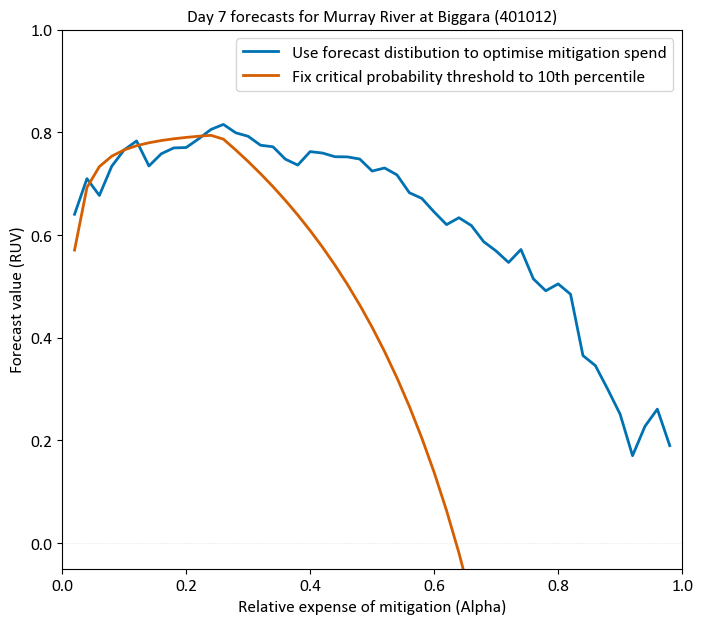

In [8]:
plt.plot(decision_definition['alphas'], results_optim['ruv'], color=colors['dark blue'], linewidth=2, alpha=1.0, label='Use forecast distibution to optimise mitigation spend')
plt.plot(decision_definition['alphas'], results_fixed_10th['ruv'], color=colors['dark_orange'], linewidth=2, alpha=1.0, label='Fix critical probability threshold to 10th percentile')
plt.axhline(0, color='grey', linewidth=0.5, alpha=0.3, linestyle='dotted')
plt.xlim((0, 1))
plt.ylim(-0.05, 1)
plt.xlabel('Relative expense of mitigation (Alpha)')
plt.ylabel('Forecast value (RUV)')
plt.title('Day 7 forecasts for Murray River at Biggara (401012)', fontsize='medium')
plt.legend()

# Vary risk aversion and decision type in the decision context

In [12]:
decision_definition = {
    'alphas': np.array([0.6]),
    'damage_function': [logistic_zero, {'A': 1, 'k': 0.5, 'threshold': np.nanquantile(obs, 0.9)}],
    'economic_model': [cost_loss, cost_loss_analytical_spend],
    'decision_method': 'optimise_over_forecast_distribution'
}

ref = clim_ens  # use 14-day moving average climatology as reference forecast (pre-caulcated in example dataset)

risk_aversions = np.arange(0, 100, 2)
decision_types = ['Binary', 'Multicategorical', 'Continuous']

In [13]:
results = pd.DataFrame(columns=decision_types, index=risk_aversions)

for risk_aversion in risk_aversions:
    decision_definition['utility_function'] = [cara, {'A': risk_aversion}]
    
    for decision_type in decision_types:
        print(risk_aversion, decision_type)

        if decision_type == 'Binary':
            decision_definition['decision_thresholds'] = np.nanquantile(obs, [0, 0.75])
        elif decision_type == 'Multicategorical':
            decision_definition['decision_thresholds'] = np.nanquantile(obs, [0, 0.1, 0.25, 0.5, 0.75, 0.9])
        elif decision_type == 'Continuous':
            decision_definition['decision_thresholds'] = None

        result = relative_utility_value(obs, fcst_ens, ref, decision_definition, parallel_nodes=parallel_nodes)
        results.loc[risk_aversion, decision_type] = result['ruv'][0]

0 Binary
Alpha: 0.600   RUV: 0.68
0 Multicategorical
Alpha: 0.600   RUV: 0.57
0 Continuous
Alpha: 0.600   RUV: 0.47
2 Binary
Alpha: 0.600   RUV: 0.67
2 Multicategorical
Alpha: 0.600   RUV: 0.54
2 Continuous
Alpha: 0.600   RUV: 0.48
4 Binary
Alpha: 0.600   RUV: 0.68
4 Multicategorical
Alpha: 0.600   RUV: 0.57
4 Continuous
Alpha: 0.600   RUV: 0.49
6 Binary
Alpha: 0.600   RUV: 0.68
6 Multicategorical
Alpha: 0.600   RUV: 0.59
6 Continuous
Alpha: 0.600   RUV: 0.53
8 Binary
Alpha: 0.600   RUV: 0.67
8 Multicategorical
Alpha: 0.600   RUV: 0.57
8 Continuous
Alpha: 0.600   RUV: 0.57
10 Binary
Alpha: 0.600   RUV: 0.66
10 Multicategorical
Alpha: 0.600   RUV: 0.56
10 Continuous
Alpha: 0.600   RUV: 0.59
12 Binary
Alpha: 0.600   RUV: 0.65
12 Multicategorical
Alpha: 0.600   RUV: 0.57
12 Continuous
Alpha: 0.600   RUV: 0.62
14 Binary
Alpha: 0.600   RUV: 0.63
14 Multicategorical
Alpha: 0.600   RUV: 0.56
14 Continuous
Alpha: 0.600   RUV: 0.64
16 Binary
Alpha: 0.600   RUV: 0.62
16 Multicategorical
Alpha: 0

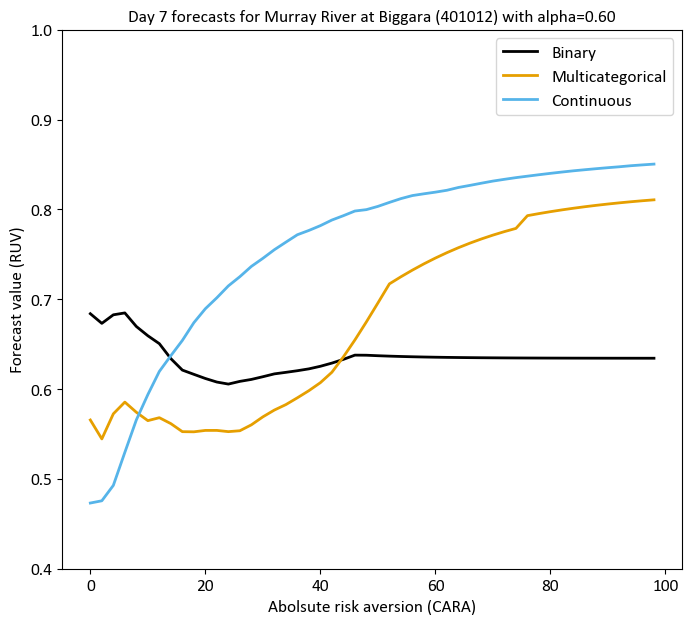

In [14]:
for i, decision_type in enumerate(decision_types):
    plt.plot(results[decision_type], color=list(colors.values())[i], linewidth=2, alpha=1.0, label=decision_type)
plt.axhline(0, color='grey', linewidth=0.5, alpha=0.3, linestyle='dotted')
plt.ylim(0.4, 1)
plt.xlabel('Abolsute risk aversion (CARA)')
plt.ylabel('Forecast value (RUV)')
plt.title('Day 7 forecasts for Murray River at Biggara (401012) with alpha=%.2f' % decision_definition['alphas'][0], fontsize='medium')
plt.legend()